####   Health Insurance Data Analytics

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df= pd.read_csv(r'C:\Users\Andrew Okebugwu.LPT14-AOKEBUGWU\Documents\Python stuffs\Health Insurance\insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Exploratory data analytics

In [4]:
#Accessing for summaries
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Group by 'children' to get counts, total charges, and average charges
summary = df.groupby('children').agg(
    Patient_Count=('charges', 'count'),
    Total_Charges=('charges', 'sum'),
    Average_Charges=('charges', 'mean')
).reset_index()

print(summary)

   children  Patient_Count  Total_Charges  Average_Charges
0         0            574   7.098070e+06     12365.975602
1         1            324   4.124900e+06     12731.171832
2         2            240   3.617655e+06     15073.563734
3         3            157   2.410785e+06     15355.318367
4         4             25   3.462664e+05     13850.656311
5         5             18   1.581486e+05      8786.035247


In [8]:
#Calculating  total charges accrued.
total_charges=df['charges'].sum()
print(total_charges)

17755824.990759


In [9]:
 #Total Charges by Region
region_sum = df.groupby('region') ['charges'].sum()
print(region_sum)

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64


In [10]:
# Total Charges by Smoking Status
smoker_sum = df.groupby('smoker')['charges'].sum()
smoker_sum

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

In [12]:
# Grouping for age and BMI
df['Age_Group'] = pd.cut(df['age'], bins=[0, 10, 19, 25, 40, 60, float('inf')],
                         labels=['Child', 'Adolescent', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

df['BMI_Category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [15]:
#Calculating average charges for determinants.
# 1. Average Charges by Age Group
age_group_avg = df.groupby('Age_Group', observed=False)['charges'].mean()

# 2. Average Charges by BMI Category
bmi_category_avg = df.groupby('BMI_Category', observed=False)['charges'].mean()

# 3. Average Charges by Smoking Status
smoker_avg = df.groupby('smoker')['charges'].mean()

#4. Average charges by region
region_avg = df.groupby('region')['charges'].mean()
#5. Average charges by sex
gender_avg = df.groupby('sex', observed=False)['charges'].mean()

#6 Average charges by number of children
children_avg = df.groupby('children', observed=False)['charges'].mean()

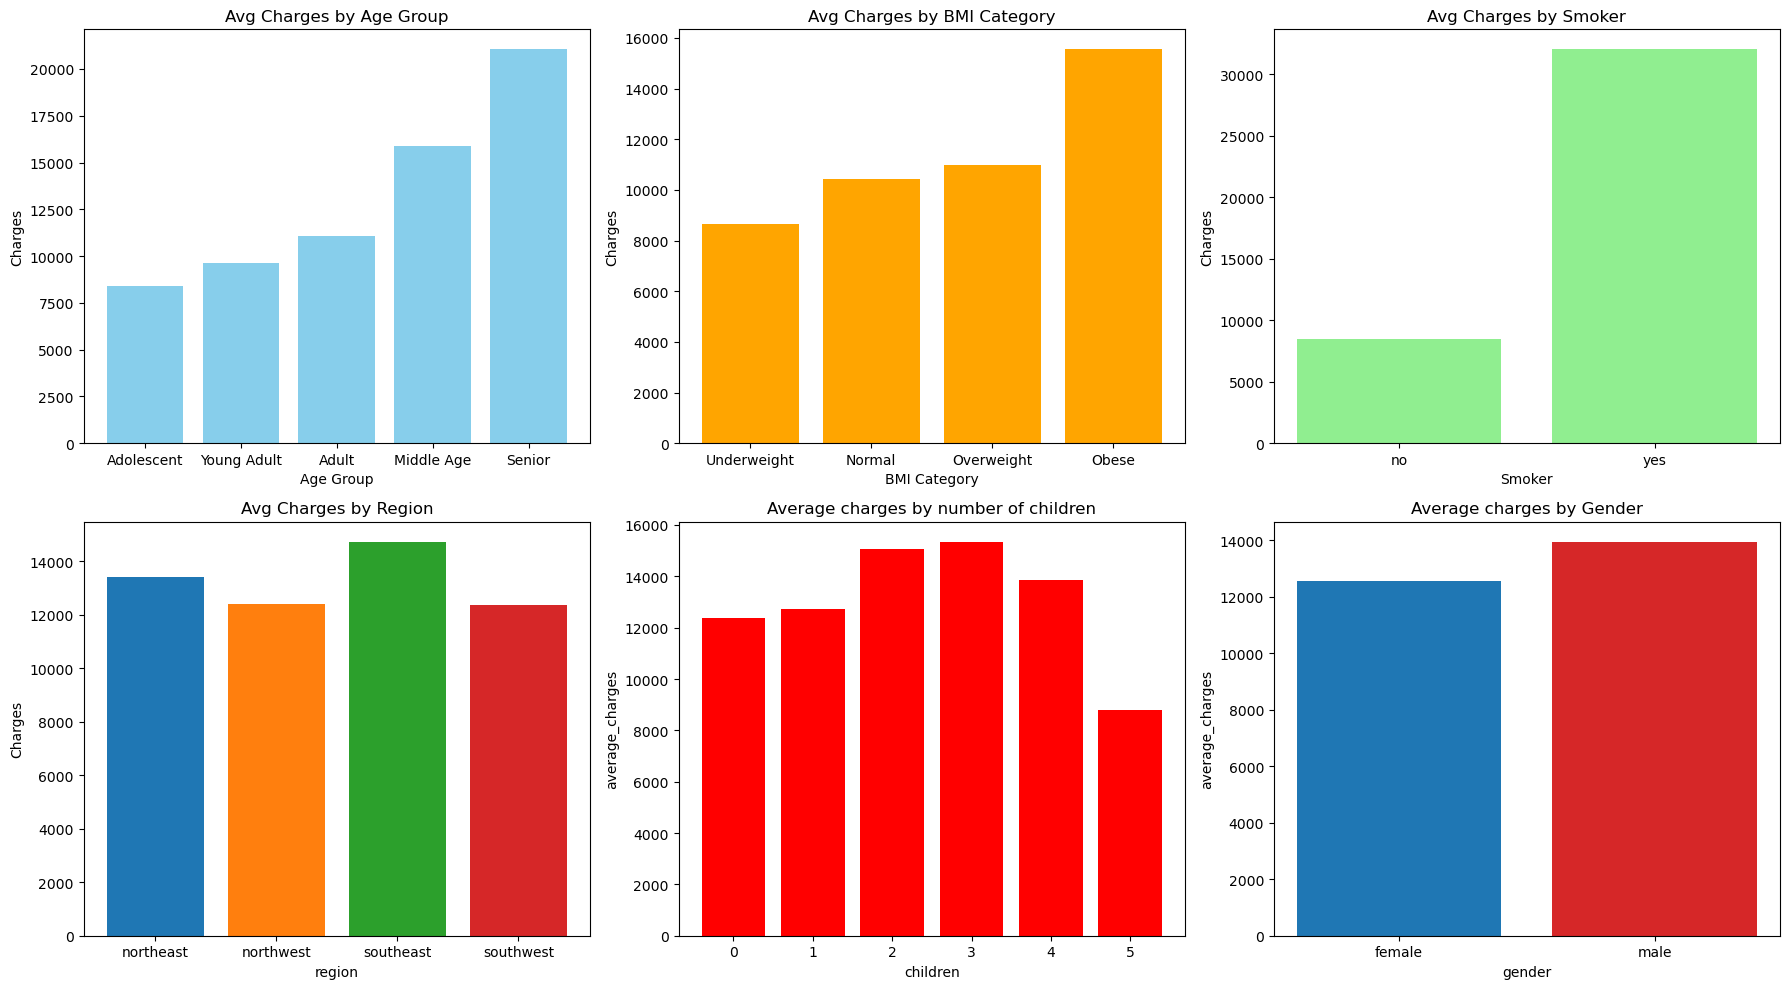

In [16]:
# Plotting with Matplotlib
fig, axs = plt.subplots(2, 3, figsize=(18, 10)) #This specifies the layout grid of the subplot: 2 rows 3 columns, fisize-width=18, height=10.axs= individual plotting areas

# Drawing a bar chart to show relationship between age group and average charges
axs[0,0].bar(age_group_avg.index.astype(str), age_group_avg.values, color='skyblue')
axs[0,0].set_title('Avg Charges by Age Group')
axs[0,0].set_ylabel('Charges')
axs[0,0].set_xlabel('Age Group')

#  Drawing a bar chart to show relationship between BMI category and average charges
axs[0,1].bar(bmi_category_avg.index.astype(str), bmi_category_avg.values, color='orange')
axs[0,1].set_title('Avg Charges by BMI Category')
axs[0,1].set_ylabel('Charges')
axs[0,1].set_xlabel('BMI Category')

# Drawing a bar chart to show relationship between smoking and average charges
axs[0,2].bar(smoker_avg.index.astype(str), smoker_avg.values, color='lightgreen')
axs[0,2].set_title('Avg Charges by Smoker')
axs[0,2].set_ylabel('Charges')
axs[0,2].set_xlabel('Smoker')

# Drawing a bar chart to show distribution of the charges among the different  between age group and average charges
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red" ]
axs[1,0].bar(region_avg.index.astype(str), region_avg.values, color=colors)
axs[1,0].set_title('Avg Charges by Region')
axs[1,0].set_ylabel('Charges')
axs[1,0].set_xlabel('region')
plt.tight_layout()

# Drawing a bar chart to show relationship between age group and average charges
axs[1,1].bar(children_avg.index.astype(str), children_avg.values, color='red')             
axs[1,1].set_ylabel('average_charges')                          
axs[1,1].set_title('Average charges by number of children')             
plt.tight_layout()                           

# Drawing a bar chart to show relationship between age group and average charges
colors = ["tab:blue", "tab:red" ]
axs[1,2].bar(gender_avg.index.astype(str), gender_avg.values, color=colors)                                       
axs[1,2].set_xlabel("gender")                        
axs[1,2].set_ylabel("average_charges")                          
axs[1,2].set_title("Average charges by Gender")             
plt.tight_layout()                          
plt.show() 

In [ ]:
# 1. The older the patients, the higher than the charges. This is true since old age is associated with nn communicable disease, such as hypertension, diabetes, arthritis etc
# 2. There is direct proportionality between the BMI and average charges.
# 3. Smokers pay more than non smokers because of associated health issues that can arise amongst smokers. 
# 4. South East region accounted for the highest average charges while northwest and south west region tied as least contributors.
# 5. Families with 2 to 4 children have higher average charges while surprisingly, having 5 children has the least average charges even lower than those with no children.
# 6. Males have a higher average charges than females